In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest,SelectPercentile

In [4]:
data = pd.read_csv('dermatology_csv.csv')
data.head()

X = data.iloc[:,0:34]

y = data.iloc[:,-1]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy ='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X = pd.DataFrame(X)

In [5]:
mi = mutual_info_classif(X, y)
mi

array([0.06044468, 0.17941707, 0.2279342 , 0.18244335, 0.32332224,
       0.43536489, 0.2377942 , 0.42221649, 0.34162327, 0.34706074,
       0.08317769, 0.45897077, 0.07932313, 0.29428819, 0.36739814,
       0.39847255, 0.13068637, 0.07992934, 0.19100354, 0.54611409,
       0.58857717, 0.54057383, 0.21927366, 0.32423499, 0.44190454,
       0.27614233, 0.48690327, 0.39403751, 0.44864859, 0.13182773,
       0.18061635, 0.03936329, 0.47778856, 0.17996029])

In [6]:
mi = pd.Series(mi)
mi.index = X.columns

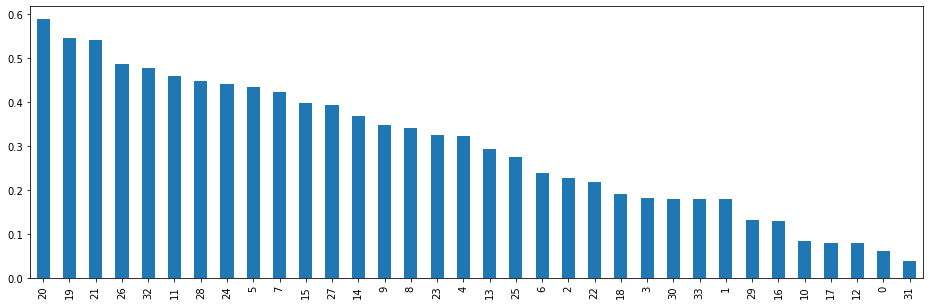

In [7]:
mi.sort_values(ascending=False, inplace = True)

mi.plot.bar(figsize = (16,5))


In [8]:
sel = SelectPercentile(mutual_info_classif, percentile=40).fit(X, y)
X.columns[sel.get_support()]


Int64Index([5, 7, 8, 11, 14, 15, 19, 20, 21, 24, 26, 27, 28, 32], dtype='int64')

In [9]:
len(X.columns[sel.get_support()])

14

In [10]:
X_mi = sel.transform(X)

X_mi.shape


(366, 14)

In [11]:
def run_randomForest(X,y):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    print('Accuracy on test set: ')
    print(accuracy_score(y, y_pred))

In [12]:
%%time
run_randomForest(X_mi, y)

Accuracy on test set: 
0.8961748633879781
CPU times: user 805 ms, sys: 295 ms, total: 1.1 s
Wall time: 926 ms
